In [1]:
#importing necessary python packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [2]:
# Importing the dataset
dt = pd.read_excel('LUAD_Genes.xlsx',index_col=0)


In [3]:
dt.shape

(517, 14807)

In [4]:
dt.head(2)

,UBE2Q2P2,SSX9,CXORF67,EFCAB8,SDR16C6P,EFCAB12,A1BG,A1CF,RBFOX1,GGACT,...,SLTM,SLU7,SLURP1,SMAD2,SMAD3,SMAD4,SMAD5,SMAD6,SMAD7,Survival
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,-0.4238,-0.1379,-0.1805,0.4529,-0.3317,-0.1012,-0.6977,-0.1476,-0.224,0.3832,...,-1.1877,3.4584,-0.2752,-0.7736,-0.6896,-0.0017,0.1779,-0.6433,0.7445,0.00
TCGA-05-4249-01,-0.3291,-0.1379,-0.1805,-0.0869,-0.3317,-0.1661,-0.1483,-0.1371,-0.226,-0.5346,...,-0.5540,0.7962,-0.2752,-0.6214,0.0881,1.3829,2.3203,-0.4918,0.0368,50.03


In [5]:
X = dt.iloc[:,0:14805]
y = dt.iloc[:, -1].values

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [8]:
# Create a random forest Regressor
rgr = RandomForestRegressor(n_estimators=100, random_state=0)

In [9]:
# Train the Regressor
rgr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [10]:
# Print the name and importance of each feature
for feature in zip(X.columns, rgr.feature_importances_):
    print(feature)

('UBE2Q2P2', 6.015097491321326e-08)
('SSX9', 0.0)
('CXORF67', 2.2444206142220222e-06)
('EFCAB8', 0.0008509507963200042)
('SDR16C6P', 0.0)
('EFCAB12', 2.800302549610349e-07)
('A1BG', 6.727988858874405e-05)
('A1CF', 1.4167476605115542e-05)
('RBFOX1', 4.8529819135735717e-08)
('GGACT', 4.3512525707351834e-07)
('A2ML1', 0.00012592000259806883)
('A2M', 0.0)
('A4GALT', 0.0)
('A4GNT', 9.079697507556061e-05)
('AAAS', 1.799148464939803e-07)
('AACSP1', 0.0)
('AACS', 0.00028538737684726104)
('AADACL2', 0.0)
('AADACL3', 0.0)
('AADACL4', 1.0962898729753833e-06)
('AADAC', 0.0)
('AAGAB', 7.626502000998984e-09)
('AAK1', 2.4586130894131707e-09)
('AAMP', 6.529007149573394e-06)
('AANAT', 6.839757273169802e-05)
('AARS2', 6.55131012067025e-08)
('AARSD1', 2.084716160935971e-05)
('AARS', 1.7662141086642634e-06)
('AASDHPPT', 4.901006301642022e-09)
('AASDH', 9.024443722313666e-07)
('AASS', 2.159978573712984e-06)
('AATF', 1.598568010102613e-06)
('AATK', 1.4653519318730898e-05)
('ABAT', 0.0017515999956516529)
('A

('CCDC108', 6.494415480767006e-06)
('MCU', 1.1641175625646574e-08)
('CCDC109B', 0.000948801204878425)
('CCDC110', 0.0)
('PRIMPOL', 2.649520593728035e-07)
('CCDC112', 0.00023550040512726431)
('CCDC113', 3.888331162860992e-08)
('CCDC114', 7.052535701249032e-06)
('CCDC115', 2.6147085631832895e-05)
('CCDC116', 6.836872894371691e-06)
('CCDC117', 1.7747540548574158e-07)
('CFAP53', 2.7821245600498475e-05)
('CCDC120', 0.00010862468235607083)
('CCDC121', 3.8289641357427715e-07)
('CCDC122', 4.5818310504591303e-07)
('CEP89', 1.56203879431089e-06)
('CCDC124', 4.664262386700434e-07)
('CCDC125', 0.0)
('CCDC126', 0.0005153186699696651)
('CCDC127', 0.0)
('CCDC129', 0.0)
('CCDC12', 0.003201299763218247)
('CCDC130', 0.0)
('CCDC132', 0.0002717140843222807)
('CCDC134', 1.3688696179319506e-05)
('DRC7', 0.0)
('CCDC136', 1.6440316376463583e-05)
('CCDC137', 4.8904115711252936e-08)
('CCDC138', 0.0)
('CCDC13', 3.3666125166430294e-11)
('CCDC140', 0.0)
('CCDC141', 1.0516619888843078e-08)
('CCDC142', 8.09262529847

('DDI2', 8.931785528149922e-06)
('DDIT3', 0.0)
('DDIT4L', 4.545996494822798e-05)
('DDIT4', 0.0003253511300969924)
('DDN', 4.636937767174108e-07)
('DDOST', 0.0006139979960113138)
('DDO', 0.0)
('DDR1', 9.330767334340244e-08)
('DDR2', 9.60935745474011e-06)
('DDRGK1', 0.0)
('DDTL', 4.853346978470921e-05)
('DDT', 2.0362845296466303e-05)
('DDX10', 1.0419004900168544e-07)
('DDX11', 0.0)
('DDX17', 0.0)
('DDX18', 1.7327817624823532e-07)
('DDX19A', 2.5745053768903237e-08)
('DDX19B', 2.9500564185255602e-06)
('DDX1', 0.0)
('DDX20', 5.988304775000768e-09)
('DDX21', 0.0)
('DDX23', 1.1440184047152183e-05)
('DDX24', 2.997411203226793e-06)
('DDX25', 0.0)
('DDX26B', 0.0)
('DDX27', 3.67362636812017e-06)
('DDX28', 0.0)
('DDX31', 5.3502962638114e-07)
('DDX39A', 0.0)
('DDX3X', 8.063235275900769e-06)
('DDX41', 6.126530315011552e-08)
('DDX42', 3.6386611374211366e-08)
('DDX43', 0.0)
('DDX46', 3.598742131723049e-09)
('DDX47', 1.298173677815195e-07)
('DDX49', 3.9058215516822194e-07)
('DDX4', 0.0)
('DDX50', 4.463

('HBP1', 9.89543734105562e-05)
('HBQ1', 0.0)
('HBS1L', 0.00017914850555197866)
('LAMTOR5', 7.517951596597228e-05)
('HBZ', 0.0)
('HCCS', 1.8911911776515436e-05)
('HCFC1R1', 0.00040382446454239273)
('HCFC1', 0.0)
('HCFC2', 1.98592540775541e-09)
('HCG11', 0.0)
('HCG18', 1.1215640734305057e-09)
('HCG22', 3.093045985527661e-08)
('HCG27', 0.0008814806095146045)
('HCG9', 0.0)
('HCK', 0.0)
('HCLS1', 0.0009250357451893543)
('HCN1', 0.0)
('HCN2', 3.1711174593728957e-09)
('HCN3', 3.429491815679201e-08)
('HCN4', 2.445536513828668e-07)
('HCP5', 1.326975653886164e-06)
('HCRTR1', 2.433635008944275e-08)
('HCRTR2', 1.742336973934543e-05)
('HCRT', 1.1469055605156565e-05)
('HCST', 0.0)
('HDAC10', 0.0)
('HDAC11', 0.0)
('HDAC1', 0.0)
('HDAC2', 0.0)
('HDAC3', 1.697755862020733e-05)
('HDAC4', 4.203886136516087e-06)
('HDAC5', 8.007361767777896e-06)
('HDAC6', 9.751029471600306e-07)
('HDAC7', 0.0)
('HDAC8', 3.116635264039377e-05)
('HDAC9', 2.8743643529212315e-11)
('HDC', 5.3202300012327326e-08)
('HDDC2', 4.2028

('NAP1L1', 1.514454569714593e-05)
('NAP1L2', 0.0)
('NAP1L3', 9.109415263896245e-07)
('NAP1L4', 5.03452554447083e-07)
('NAP1L5', 1.9354746689899637e-05)
('NAP1L6', 0.00025808970677333254)
('NAPA', 0.0)
('NAPEPLD', 2.5146225394442533e-06)
('NAPG', 3.5430835355011565e-06)
('NAPRT', 0.0)
('NAPSA', 0.0)
('NAPSB', 8.916336873213796e-08)
('NARFL', 1.4841202516781743e-07)
('NARF', 0.0)
('ICE2', 7.099530696187557e-08)
('NARS2', 0.0)
('NARS', 1.2779363320043107e-05)
('NASP', 2.6260666369145455e-07)
('NAT10', 3.1919495279053453e-07)
('NAT14', 0.0)
('NAA60', 0.0)
('NAT1', 1.204973707084454e-07)
('NAT2', 0.0)
('NAT6', 0.0)
('NAT8L', 6.17620727366598e-05)
('NAT8', 0.0)
('NAT9', 1.41037154605101e-11)
('NAV1', 0.0)
('NAV2', 2.9154968509061424e-06)
('NAV3', 0.0)
('NBAS', 2.4886502052594014e-09)
('NBEAL1', 9.009543594062806e-10)
('NBEAL2', 9.53007243444538e-07)
('NBEA', 0.0)
('NBL1', 0.0001800779256998239)
('NBN', 1.054805321698378e-07)
('NBPF14', 7.3900342155894355e-06)
('NBPF15', 1.938190976817634e-05

('RGS19', 3.5254344216243976e-09)
('RGS1', 1.415513569205984e-07)
('RGS20', 3.9594730939894243e-07)
('RGS21', 0.0)
('RGS22', 3.1481919147291324e-05)
('RGS2', 3.277524946521555e-07)
('RGS3', 0.000546316482143772)
('RGS4', 0.0)
('RGS5', 2.2673765105118496e-07)
('RGS6', 0.0)
('RGS7BP', 0.0)
('RGS7', 0.0)
('RGS8', 4.057107222735465e-08)
('RGS9BP', 0.0)
('RGS9', 0.0009513855515610667)
('RGSL1', 0.0)
('RHAG', 4.8344904419397274e-05)
('RHBDD1', 0.0)
('RHBDD2', 1.1842544524038368e-09)
('RHBDD3', 3.6202528769293703e-07)
('RHBDF1', 0.0)
('RHBDF2', 3.807600345631024e-06)
('RHBDL1', 8.94872467696638e-05)
('RHBG', 9.710924200597063e-06)
('RHCE', 1.0133732288545772e-06)
('RHCG', 2.083219992615048e-05)
('RHD', 6.6929841950188315e-09)
('RHEBL1', 0.0008771955968148269)
('RHEB', 0.0)
('RHOA', 0.0)
('RHOBTB1', 1.3772736930753306e-06)
('RHOBTB2', 0.0)
('RHOBTB3', 1.5801020593663552e-06)
('RHOB', 5.760942516218332e-06)
('RHOC', 1.1509725768463919e-07)
('RHOD', 0.0)
('RHOF', 2.6737665494812065e-07)
('RHOG',

In [11]:
#Select the best features from the regressor
sfm = SelectFromModel(rgr)

In [12]:
# Train the Regressor
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [13]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

EFCAB8
A2ML1
A4GNT
AACS
AANAT
ABAT
ABCA10
ABCA3
ABCA5
ABCA8
ABCB6
ABCC11
ABCC4
ABCC9
ABCD2
ABCD4
ABCG8
ABHD2
ABRA
ABT1
ACBD7
ASIC2
ACCSL
ACER2
ACOX3
ACP1
ACRBP
ACRV1
ACSBG2
ACSM1
ACSM4
ACSS2
ACTA1
ACTBL2
ACTN4
ACTR3C
ACTR8
ACVR1C
ACVR2B
ACYP1
ADAL
ADAM23
ADAMTS18
ADAMTS20
ADAMTS6
ADAMTSL1
ADCK5
ADCY3
ADCYAP1R1
ADH1C
ADORA3
ADPRHL2
ADPRH
ADRA1B
ADSSL1
AFF1
AGBL2
AGFG1
AGR3
AHCTF1
AIF1L
AIFM3
AIM2
AIP
AKAP6
AKR1B1
AKR7A2
AKT1S1
AKTIP
ALDH6A1
ALG5
ALG6
ALG8
ALKBH8
ALOX12B
ALOX12P2
SLC35G6
AMFR
AMN
AMPD1
AMZ2
ANAPC10
ANAPC1
ANGPTL3
ANKFY1
ANKRD10
ANKRD13B
ANKRD22
ANKRD26P1
ANKRD28
ANKRD36B
ANKRD39
ANKRD49
ANKEF1
ANKS1A
ANTXR1
ANXA6
AP3D1
APC2
APCDD1
APLN
APOBEC2
APOBEC3A
APPBP2
AQP8
AQP9
ARAF
ARCN1
ARFIP2
ARG2
ARHGAP11B
ARHGAP8
ARHGEF10
ARID2
ARID4A
ARMCX5
ARPC1A
ACTRT3
ARRB1
ARRB2
ARRDC3
ARSA
ARSB
ART3
ARV1
AS3MT
ASAP2
ASCL4
ASTE1
ASTN1
ATAD3C
ATL2
ATOH7
ATP5J
ATP5O
ATP6V0E1
ATP6V1C2
ATP6V1E2
ATP8A1
AVEN
AVIL
B2M
B3GALT4
B3GNT6
B3GNT8
B4GALT3
BACE2
BAG1
BAMBI
BANK1
BCAM
BCAR1
BCL7C
NBEAP1

In [14]:
sfm.get_support().sum()

1659

In [15]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_val = sfm.transform(X_val)
X_important_test = sfm.transform(X_test)

In [16]:
rgr_important = RandomForestRegressor()

# Train the new Regressor on the new dataset containing the most important features
rgr_important.fit(X_important_train, y_train)

/Users/Zayeem/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
y_predval = rgr_important.predict(X_important_val)

In [18]:
#Compare The Accuracy Of Our Full Feature Classifier To Our Limited Feature Classifier
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

18.395373493975903
619.5024770120482
24.88980668892485
R2 Score
-0.13382665822928508


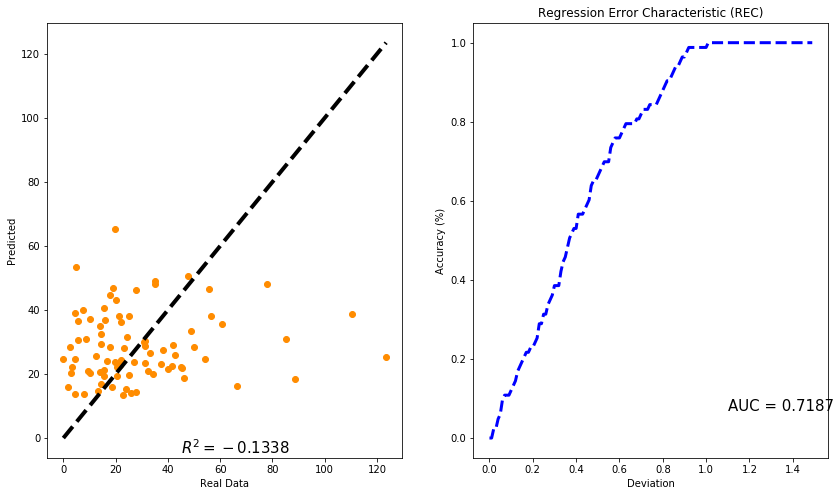

In [20]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [21]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split':[1.0,2,5,10,30,50,70,90,100],
 'min_samples_leaf':[0.1,0.20,0.3,0.4,0.5,1, 2, 4],
 'n_estimators': [100,200, 400, 600]}
regressor = RandomForestRegressor()
random=RandomizedSearchCV(estimator=regressor,param_distributions=param_grid,cv=3,n_iter=10)
random_result=random.fit(X_important_train,y_train)
print("Best: %f using %s" % (random_result.best_score_,random_result.best_params_))

Best: 0.014655 using {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [22]:
regressor = RandomForestRegressor(n_estimators=100,max_depth=50,min_samples_split = 5,min_samples_leaf=4,max_features='sqrt',bootstrap=True)

regressor.fit(X_important_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
y_predval = regressor.predict(X_important_val)

In [24]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(X_important_val, y_val))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

17.056025125585496
547.7199970511916
23.40341849070754
Variance score: -0.00
R2 Score
-0.0024488310315970985


R^2 = -0.0024


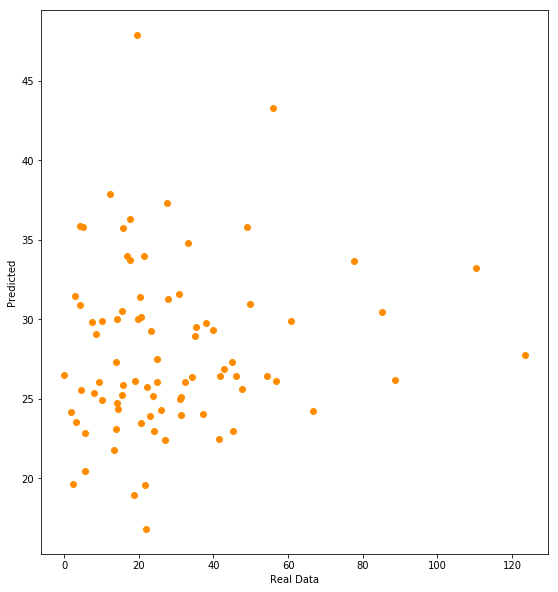

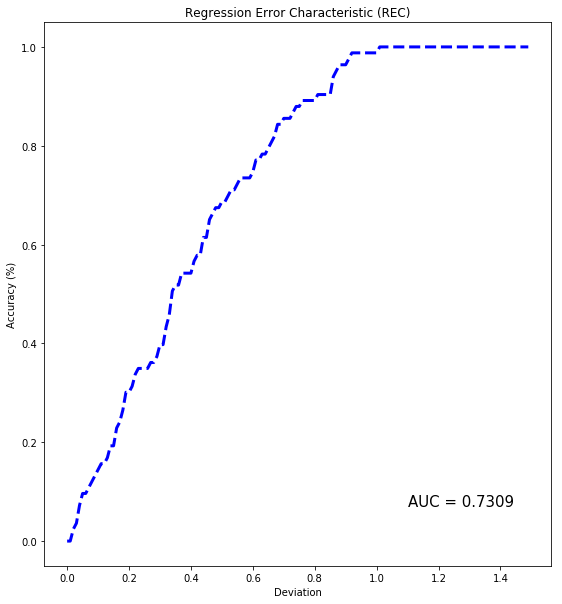

In [25]:
# Visualising the Random Forest Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [26]:
###############################################Testing Set##############################################################

# Fitting Training Set
regressor = RandomForestRegressor(n_estimators=100,max_depth=50,min_samples_split = 5,min_samples_leaf=4,max_features='sqrt',bootstrap=True)

regressor.fit(X_important_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_important_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(X_important_test, y_test))

from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)

print('R2 Score')
print(accuracy)

21.192316151928843
1326.4896419700801
36.421005504654595
Variance score: 0.03
R2 Score
0.029364399138859798


R^2 = 0.0294


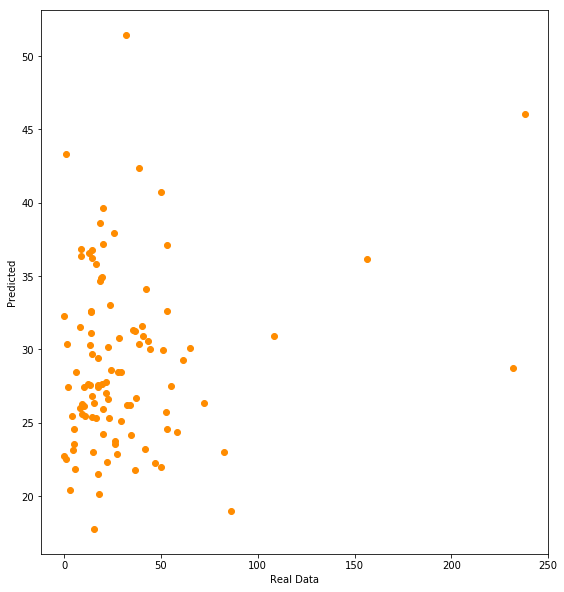

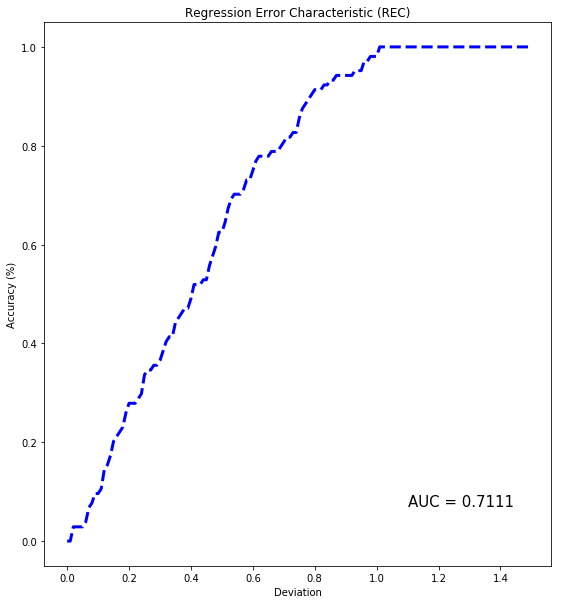

In [27]:
# Visualising the Random Forest Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_test , y_pred):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_test)):
            if np.linalg.norm(y_test[j] - y_pred[j]) / np.sqrt( np.linalg.norm(y_test[j]) **2 + np.linalg.norm(y_pred[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_test))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_test, y_pred)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_test, y_pred)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()